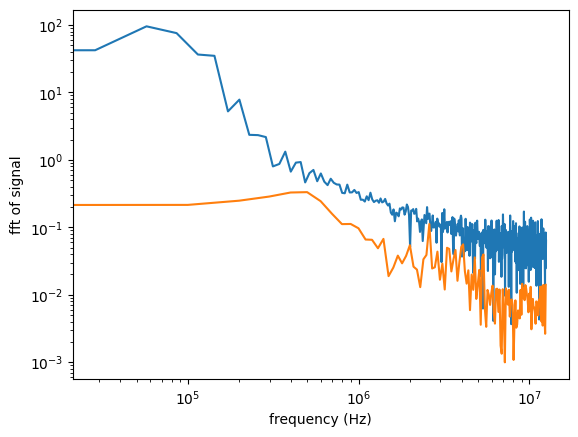

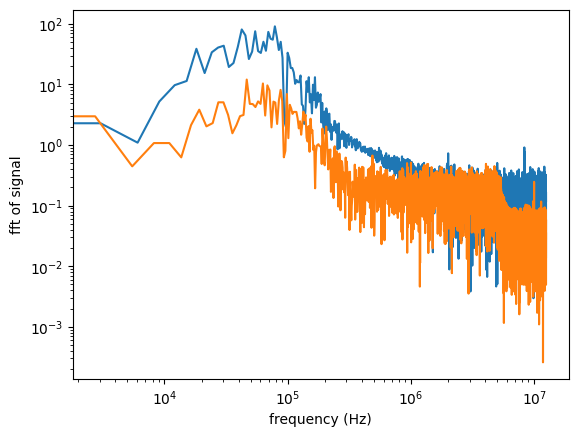

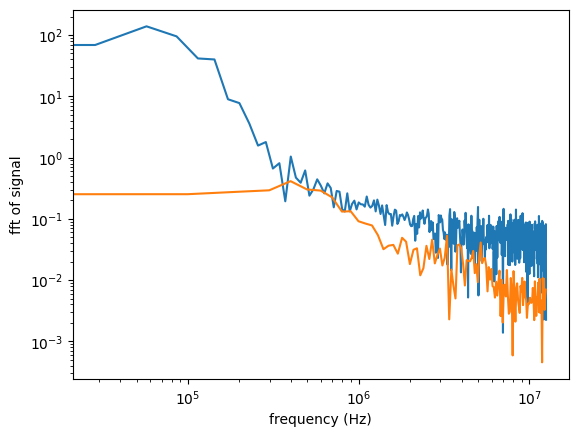

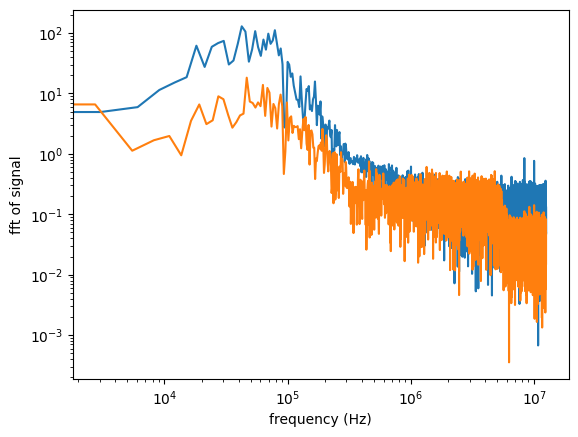

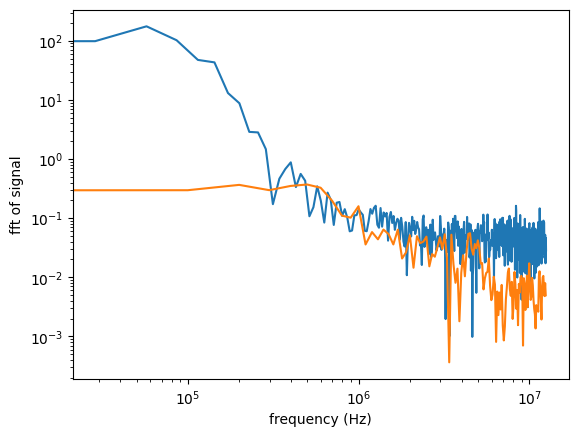

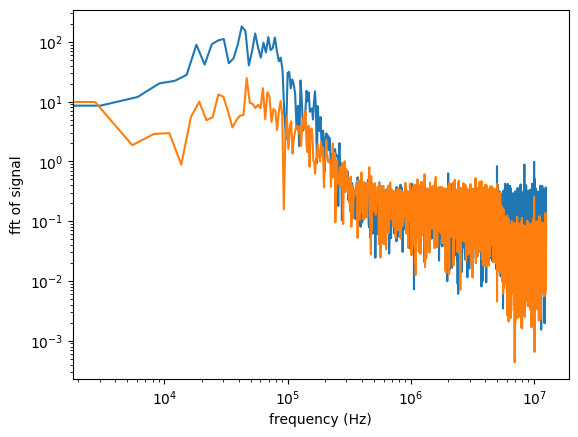

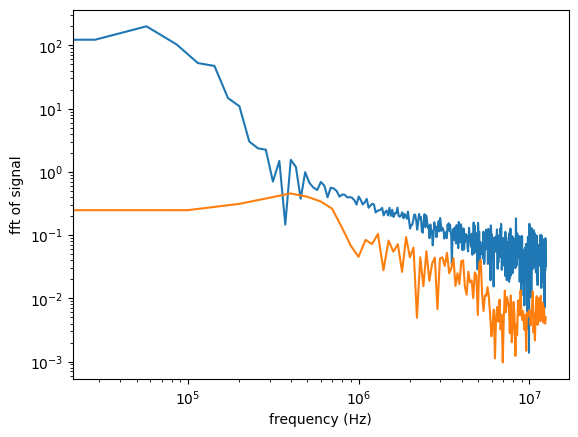

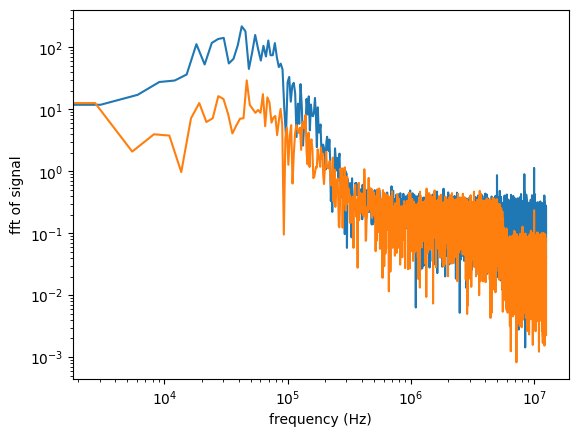

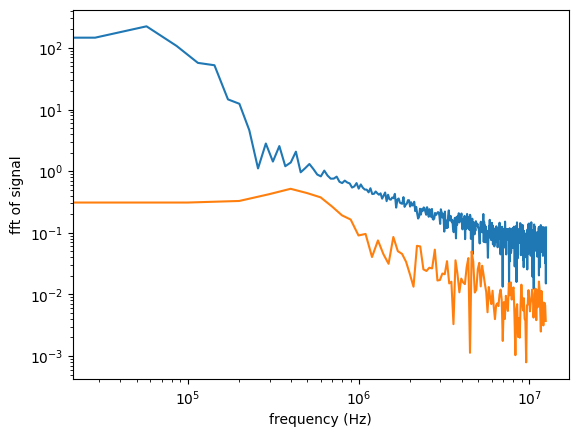

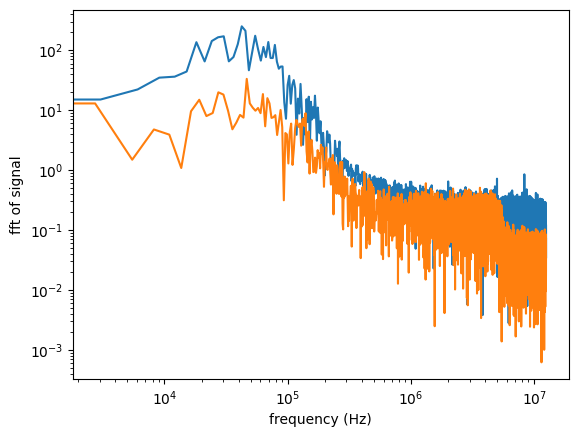

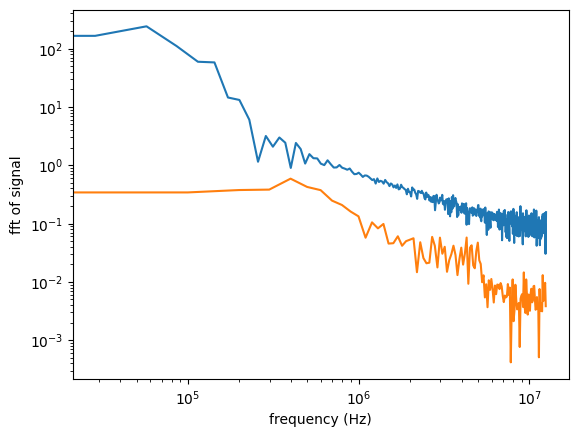

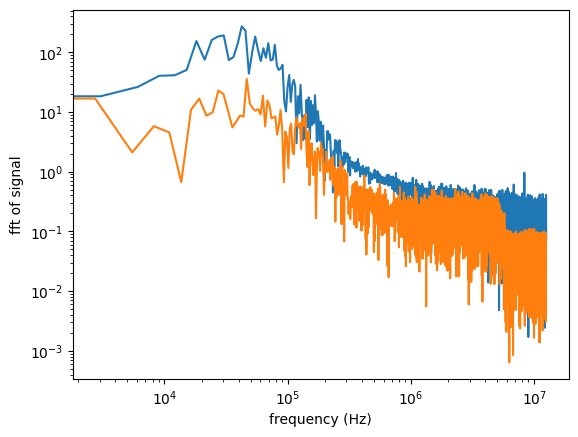

In [50]:
import numpy as np
import sys
sys.path.append("../../lhillber/brownian/src")
from time_series import CollectionTDMS as ctdms
from acoustic_entrainment import mic_response
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
from scipy.optimize import curve_fit

data = ["data/20230515/ene_scan/laser-X_microphone-Y0.00068V-per-Pa/iter_" + str(i) + ".tdms" for i in range(6)]

for i in range(len(data)):
    laser = ctdms(data[i])
    micro = ctdms(data[i])
    laser.set_collection("X")
    laser.apply("detrend", mode = "linear", inplace = True)
    laser.apply("time_gate", tmin = 2.8e-4, tmax = 2.9e-4, inplace = True)
    micro.set_collection("Y")
    micro.apply("detrend", mode = "linear", inplace = True)
    micro.apply("time_gate", tmin = 2.9e-4, tmax = 3.25e-4, inplace = True)
    
    plt.loglog(rfftfreq(len(micro.collection[3].x), 1 / micro.collection[3].r), np.abs(rfft(micro.collection[3].x)))
    plt.loglog(rfftfreq(len(laser.collection[3].x), 1 / laser.collection[3].r), np.abs(rfft(laser.collection[3].x)))
    plt.xlabel("frequency (Hz)")
    plt.ylabel("fft of signal")
    plt.show()
    
    laser = ctdms(data[i])
    micro = ctdms(data[i])
    laser.set_collection("X")
    laser.apply("detrend", mode = "linear", inplace = True)
    laser.apply("time_gate", tmin = 2.9e-4, tmax = None, inplace = True)
    micro.set_collection("Y")
    micro.apply("detrend", mode = "linear", inplace = True)
    micro.apply("time_gate", tmin = 3.25e-4, tmax = None, inplace = True)
    
    plt.loglog(rfftfreq(len(micro.collection[3].x), 1 / micro.collection[3].r), np.abs(rfft(micro.collection[3].x)))
    plt.loglog(rfftfreq(len(laser.collection[3].x), 1 / laser.collection[3].r), np.abs(rfft(laser.collection[3].x)))
    plt.xlabel("frequency (Hz)")
    plt.ylabel("fft of signal")
    plt.show()